In [ ]:
from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer (1).csv


https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
df=pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.shape

(309, 16)

In [ ]:
df['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

1<-Normal
2<-Suspect
3<-Pathological

Separating the target and feature variables

In [ ]:
x=df.drop (columns='LUNG_CANCER', axis=1)
y=df['LUNG_CANCER']
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2


#standardization using StandardScaler

Selecting features that have a greater than 10% correlation with the target variable


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda col: le.fit_transform(col))
ss = StandardScaler()
ss.fit(df)
standardized_data = ss.transform(df)


#ss = StandardScaler()
#ss.fit(x)
#standardized_data=ss.transform(x)

In [ ]:
print(standardized_data)

[[ 0.95257934  0.77185028 -1.13529242 ...  1.06350105  0.892475
   0.38005848]
 [ 0.95257934  1.38182914  0.88083033 ...  1.06350105  0.892475
   0.38005848]
 [-1.04978132 -0.44810745 -1.13529242 ... -0.94029056  0.892475
  -2.63117406]
 ...
 [ 0.95257934 -0.57010322  0.88083033 ... -0.94029056  0.892475
   0.38005848]
 [ 0.95257934  0.52785873  0.88083033 ... -0.94029056  0.892475
   0.38005848]
 [ 0.95257934 -0.08212013 -1.13529242 ...  1.06350105 -1.12047956
   0.38005848]]


In [ ]:
x=standardized_data
y = df['LUNG_CANCER']

##Train test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=2)

## **Naive** **Bayes**

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Classification Report of Naive Bayes:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


Naive Bayes Classifier Success Rate: 100.00%


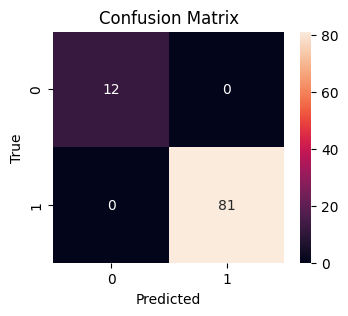

In [ ]:

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Classifier Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [ ]:
# Support vector machine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


Support Vector Classifier Success Rate: 98.92%


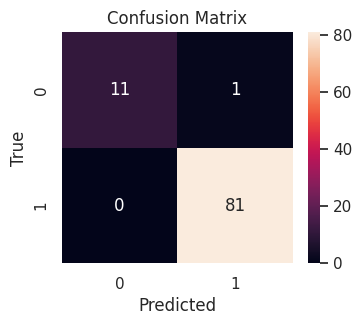

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Classifier Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## K- Nearest Neighbors

In [ ]:
# KNN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 0, 81]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report of KNN:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report of KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


K-Nearest Neighbors (KNN) Success Rate: 100.00%


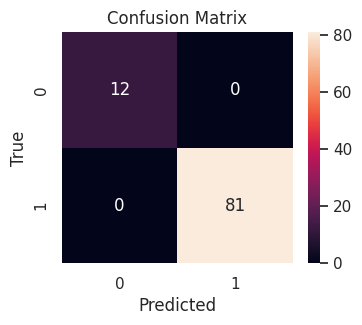

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors (KNN) Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Parameter tuning, Finding optimum parameters

## K-NN tuning

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

tic = time.time()

knn_gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
knn_gs_res = knn_gs.fit(x_train, y_train)
best_params = knn_gs_res.best_params_

print("Best score: ",knn_gs_res.best_score_)
print("Best parameters: ",best_params)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score:  0.9907407407407408
Best parameters:  {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
Total elapsed time: 2.4968173503875732 seconds.


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)

y_hat = knn.predict(x_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Training set accuracy:  1.0
Test set accuracy:  1.0
[[12  0]
 [ 0 81]]


## Logistic Regression

In [ ]:
# Binomial_logistic_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)

predictions = logreg.predict(x_test)
print('Classification Report BLR:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Coefficients: [[-0.00450957  0.04336569  0.14704673  0.22417611  0.22598895  0.24335518
   0.27947047  0.2884515   0.34309685  0.1376365   0.23440985  0.24714351
   0.11743864  0.26456557  0.11941721  2.5138343 ]]
Intercept: [4.56005296]
Classification Report BLR:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


LogisticRegression Success Rate: 100.00%


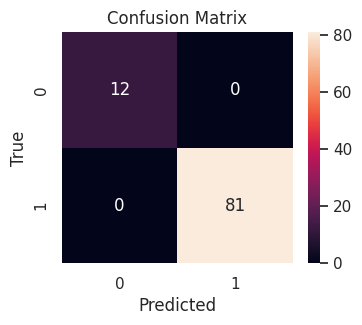

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
p1=logreg.predict(x_test)
s1=accuracy_score(y_test,p1)
accuracy = accuracy_score(y_test, p1)
print("LogisticRegression Success Rate: {:.2f}%".format(100 * s1))

cm = confusion_matrix(y_test, p1)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## LR tuning

In [ ]:
params ={'C':[0.001,0.01,0.1,1,10,100,1000],
      "penalty":["l1","l2"]}

tic = time.time()

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,params,cv=10)
logreg_cv.fit(x_train,y_train)

best_params = logreg_cv.best_params_

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
Accuracy : 1.0
Total elapsed time: 0.4732987880706787 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

In [ ]:
logreg = LogisticRegression(**best_params)
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
print(classification_report(y_test, y_pred_test))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Test set accuracy:  1.0
[[12  0]
 [ 0 81]]


In [ ]:
# adaptive_boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(x_train, y_train)

In [ ]:
predictions = AdaModel.predict(x_test)
print('Classification Report of AdaBoost:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of AdaBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


AdaBoost Success Rate: 100.00%


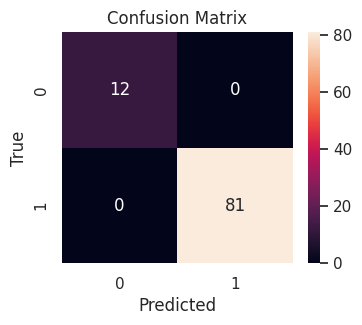

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
AdaModel.fit(x_train,y_train)
p5=AdaModel.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)

print("AdaBoost Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


Accuracy: 1.0000
Confusion Matrix:
 [[12  0]
 [ 0 81]]


Random Forest Success Rate: 100.00%


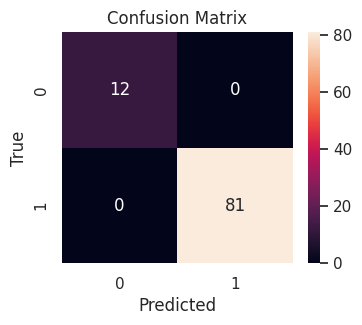

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train,y_train)
p5=rf.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)
print("Random Forest Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## DTC/CART/J48

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred  = drugTree.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = drugTree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


Accuracy: 1.0000
Confusion Matrix:
 [[12  0]
 [ 0 81]]


DecisionTreeClassifier Success Rate: 100.00%


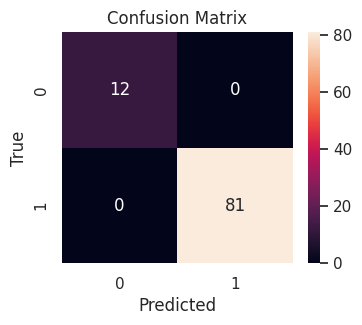

In [ ]:
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)
p5=drugTree.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)
print("DecisionTreeClassifier Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## GBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(x_train,y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



Gradient Boosting Classifier Success Rate: 100.00%


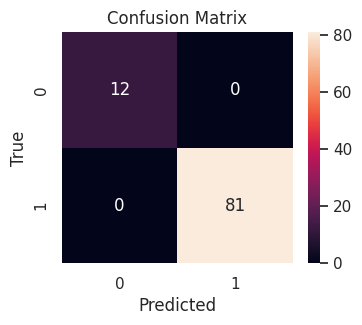

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)
p5=gradient_booster.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)

print("Gradient Boosting Classifier Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#standardization using MinMaxScaler

Selecting features that have a greater than 10% correlation with the target variable


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to non-numeric columns
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda col: le.fit_transform(col))

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
scaled_data = scaler.fit_transform(df)



#ss = StandardScaler()
#ss.fit(x)
#standardized_data=ss.transform(x)

In [ ]:
print(scaled_data)

[[1.         0.72727273 0.         ... 1.         1.         1.        ]
 [1.         0.8030303  1.         ... 1.         1.         1.        ]
 [0.         0.57575758 0.         ... 0.         1.         0.        ]
 ...
 [1.         0.56060606 1.         ... 0.         1.         1.        ]
 [1.         0.6969697  1.         ... 0.         1.         1.        ]
 [1.         0.62121212 0.         ... 1.         0.         1.        ]]


In [ ]:
x=scaled_data
y = df['LUNG_CANCER']

##Train test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=2)

## **Naive** **Bayes**

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Classification Report of Naive Bayes:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


Naive Bayes Classifier Success Rate: 100.00%


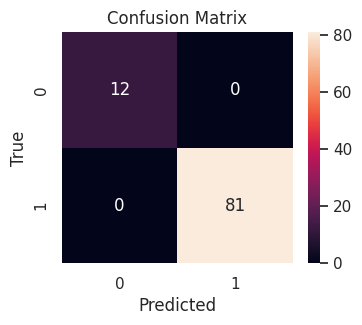

In [ ]:

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Classifier Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [ ]:
# Support vector machine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


Support Vector Classifier Success Rate: 100.00%


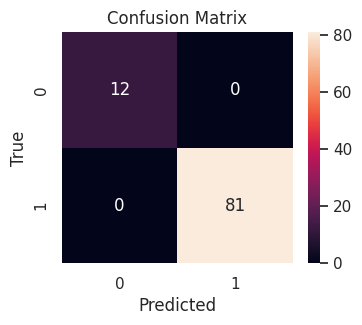

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Classifier Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## K- Nearest Neighbors

In [ ]:
# KNN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[10,  2],
       [ 1, 80]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report of KNN:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.98      0.99      0.98        81

    accuracy                           0.97        93
   macro avg       0.94      0.91      0.93        93
weighted avg       0.97      0.97      0.97        93

Confusion Matrix:
 [[10  2]
 [ 1 80]]
Accuracy Score: 0.967741935483871


K-Nearest Neighbors (KNN) Success Rate: 96.77%


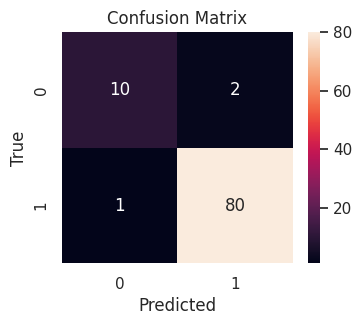

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors (KNN) Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Parameter tuning, Finding optimum parameters

## K-NN tuning

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

tic = time.time()

knn_gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
knn_gs_res = knn_gs.fit(x_train, y_train)
best_params = knn_gs_res.best_params_

print("Best score: ",knn_gs_res.best_score_)
print("Best parameters: ",best_params)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score:  0.9490740740740741
Best parameters:  {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Total elapsed time: 2.6583735942840576 seconds.


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)

y_hat = knn.predict(x_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.98      0.99      0.98        81

    accuracy                           0.97        93
   macro avg       0.94      0.91      0.93        93
weighted avg       0.97      0.97      0.97        93

Training set accuracy:  1.0
Test set accuracy:  0.967741935483871
[[10  2]
 [ 1 80]]


## Logistic Regression

In [ ]:
# Binomial_logistic_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)

predictions = logreg.predict(x_test)
print('Classification Report BLR:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Coefficients: [[-0.01125104  0.04148074  0.352692    0.50275693  0.50877648  0.54795056
   0.64503895  0.67402165  0.77872455  0.31658899  0.53529285  0.57974995
   0.26557325  0.58624098  0.26527447  4.08386393]]
Intercept: [-3.79476576]
Classification Report BLR:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


LogisticRegression Success Rate: 100.00%


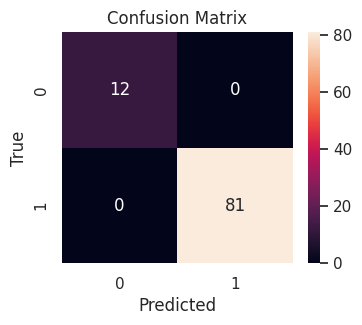

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
p1=logreg.predict(x_test)
s1=accuracy_score(y_test,p1)
accuracy = accuracy_score(y_test, p1)
print("LogisticRegression Success Rate: {:.2f}%".format(100 * s1))

cm = confusion_matrix(y_test, p1)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## LR tuning

In [ ]:
params ={'C':[0.001,0.01,0.1,1,10,100,1000],
      "penalty":["l1","l2"]}

tic = time.time()

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,params,cv=10)
logreg_cv.fit(x_train,y_train)

best_params = logreg_cv.best_params_

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
Accuracy : 1.0
Total elapsed time: 0.535712480545044 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

In [ ]:
logreg = LogisticRegression(**best_params)
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
print(classification_report(y_test, y_pred_test))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Test set accuracy:  1.0
[[12  0]
 [ 0 81]]


In [ ]:
# adaptive_boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(x_train, y_train)

In [ ]:
predictions = AdaModel.predict(x_test)
print('Classification Report of AdaBoost:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of AdaBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[12  0]
 [ 0 81]]
Accuracy Score: 1.0


AdaBoost Success Rate: 100.00%


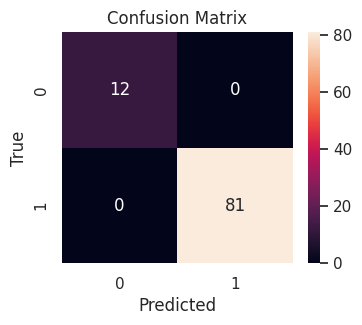

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
AdaModel.fit(x_train,y_train)
p5=AdaModel.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)

print("AdaBoost Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


Accuracy: 1.0000
Confusion Matrix:
 [[12  0]
 [ 0 81]]


Random Forest Success Rate: 100.00%


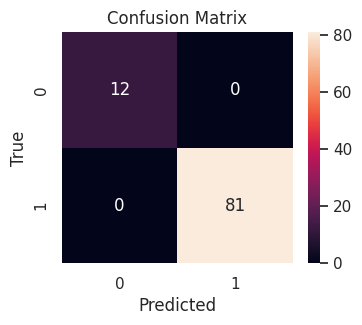

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train,y_train)
p5=rf.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)
print("Random Forest Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## DTC/CART/J48

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred  = drugTree.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = drugTree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


Accuracy: 1.0000
Confusion Matrix:
 [[12  0]
 [ 0 81]]


DecisionTreeClassifier Success Rate: 100.00%


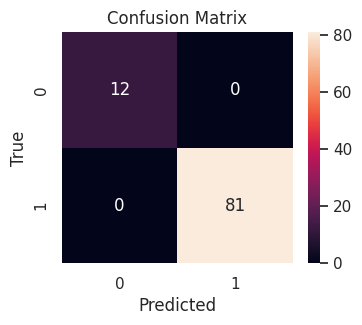

In [ ]:
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)
p5=drugTree.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)
print("DecisionTreeClassifier Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## GBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(x_train,y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        81

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



Gradient Boosting Classifier Success Rate: 100.00%


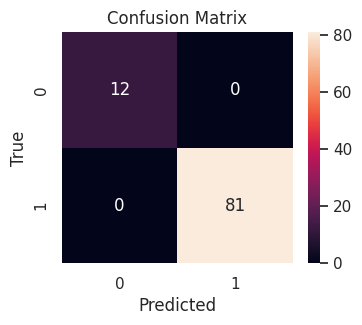

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)
p5=gradient_booster.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)

print("Gradient Boosting Classifier Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#without Normalization

Selecting features that have a greater than 10% correlation with the target variable


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to non-numeric columns
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda col: le.fit_transform(col))

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
scaled_data = scaler.fit_transform(df)



#ss = StandardScaler()
#ss.fit(x)
#standardized_data=ss.transform(x)

In [ ]:
print(scaled_data)

[[1.         0.72727273 0.         ... 1.         1.         1.        ]
 [1.         0.8030303  1.         ... 1.         1.         1.        ]
 [0.         0.57575758 0.         ... 0.         1.         0.        ]
 ...
 [1.         0.56060606 1.         ... 0.         1.         1.        ]
 [1.         0.6969697  1.         ... 0.         1.         1.        ]
 [1.         0.62121212 0.         ... 1.         0.         1.        ]]


In [ ]:
x=df.drop (columns='LUNG_CANCER', axis=1)
y=df['LUNG_CANCER']
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


##Train test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=2)

## **Naive** **Bayes**

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Classification Report of Naive Bayes:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.94      0.98      0.96        81

    accuracy                           0.92        93
   macro avg       0.86      0.78      0.81        93
weighted avg       0.92      0.92      0.92        93

Confusion Matrix:
 [[ 7  5]
 [ 2 79]]
Accuracy Score: 0.9247311827956989


Naive Bayes Classifier Success Rate: 92.47%


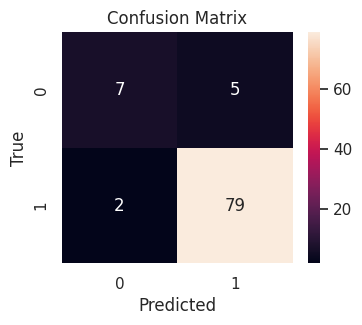

In [ ]:

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Classifier Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [ ]:
# Support vector machine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


Support Vector Classifier Success Rate: 87.10%


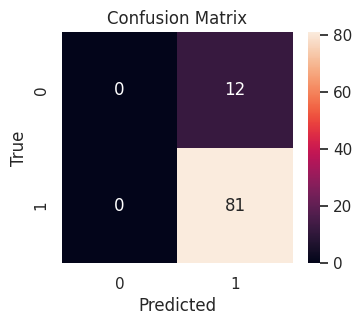

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Classifier Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## K- Nearest Neighbors

In [ ]:
# KNN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 2, 10],
       [ 2, 79]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report of KNN:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report of KNN:
               precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.88      1.00      0.94        81

    accuracy                           0.88        93
   macro avg       0.94      0.54      0.55        93
weighted avg       0.90      0.88      0.84        93

Confusion Matrix:
 [[ 1 11]
 [ 0 81]]
Accuracy Score: 0.8817204301075269


K-Nearest Neighbors (KNN) Success Rate: 87.10%


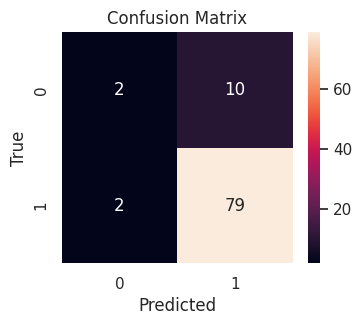

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors (KNN) Success Rate: {:.2f}%".format(100 * accuracy))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Parameter tuning, Finding optimum parameters

## K-NN tuning

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

tic = time.time()

knn_gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
knn_gs_res = knn_gs.fit(x_train, y_train)
best_params = knn_gs_res.best_params_

print("Best score: ",knn_gs_res.best_score_)
print("Best parameters: ",best_params)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score:  0.898148148148148
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Total elapsed time: 2.6658775806427 seconds.


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)

y_hat = knn.predict(x_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.91      0.96      0.93        81

    accuracy                           0.88        93
   macro avg       0.74      0.65      0.68        93
weighted avg       0.86      0.88      0.87        93

Training set accuracy:  1.0
Test set accuracy:  0.8817204301075269
[[ 4  8]
 [ 3 78]]


## Logistic Regression

In [ ]:
# Binomial_logistic_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)

predictions = logreg.predict(x_test)
print('Classification Report BLR:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Coefficients: [[-0.0087837  -0.0015513   0.83039253  0.94538869  0.93370486  0.98762936
   1.3745898   1.39516323  1.32376287  0.59929517  0.97722308  1.26870682
   0.39602362  1.03729547  0.46406139]]
Intercept: [-16.27508301]
Classification Report BLR:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.95      0.98      0.96        81

    accuracy                           0.94        93
   macro avg       0.88      0.82      0.85        93
weighted avg       0.93      0.94      0.93        93

Confusion Matrix:
 [[ 8  4]
 [ 2 79]]
Accuracy Score: 0.9354838709677419


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Success Rate: 93.55%


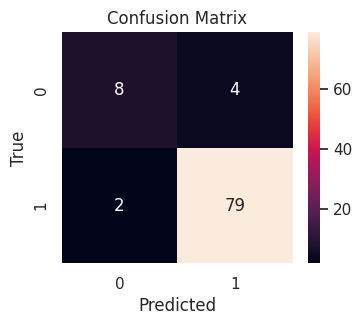

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
p1=logreg.predict(x_test)
s1=accuracy_score(y_test,p1)
accuracy = accuracy_score(y_test, p1)
print("LogisticRegression Success Rate: {:.2f}%".format(100 * s1))

cm = confusion_matrix(y_test, p1)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## LR tuning

In [ ]:
params ={'C':[0.001,0.01,0.1,1,10,100,1000],
      "penalty":["l1","l2"]}

tic = time.time()

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,params,cv=10)
logreg_cv.fit(x_train,y_train)

best_params = logreg_cv.best_params_

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
Accuracy : 0.9028138528138528
Total elapsed time: 1.4591188430786133 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
logreg = LogisticRegression(**best_params)
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
print(classification_report(y_test, y_pred_test))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.95      0.98      0.96        81

    accuracy                           0.94        93
   macro avg       0.88      0.82      0.85        93
weighted avg       0.93      0.94      0.93        93

Test set accuracy:  0.9354838709677419
[[ 8  4]
 [ 2 79]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# adaptive_boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(x_train, y_train)

In [ ]:
predictions = AdaModel.predict(x_test)
print('Classification Report of AdaBoost:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of AdaBoost:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.94      0.98      0.96        81

    accuracy                           0.92        93
   macro avg       0.86      0.78      0.81        93
weighted avg       0.92      0.92      0.92        93

Confusion Matrix:
 [[ 7  5]
 [ 2 79]]
Accuracy Score: 0.9247311827956989


AdaBoost Success Rate: 92.47%


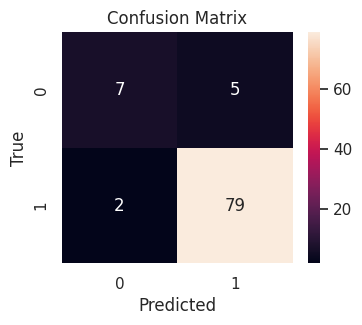

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
AdaModel.fit(x_train,y_train)
p5=AdaModel.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)

print("AdaBoost Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.93      0.98      0.95        81

    accuracy                           0.91        93
   macro avg       0.84      0.74      0.78        93
weighted avg       0.91      0.91      0.91        93


Accuracy: 0.9140
Confusion Matrix:
 [[ 6  6]
 [ 2 79]]


Random Forest Success Rate: 91.40%


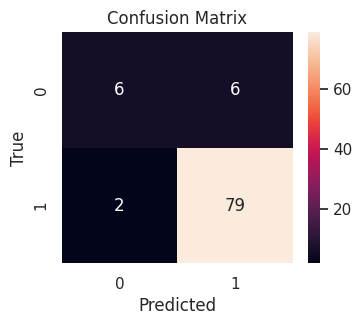

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train,y_train)
p5=rf.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)
print("Random Forest Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## DTC/CART/J48

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred  = drugTree.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = drugTree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.95      0.91      0.93        81

    accuracy                           0.88        93
   macro avg       0.74      0.79      0.76        93
weighted avg       0.90      0.88      0.89        93


Accuracy: 0.8817
Confusion Matrix:
 [[ 8  4]
 [ 7 74]]


DecisionTreeClassifier Success Rate: 88.17%


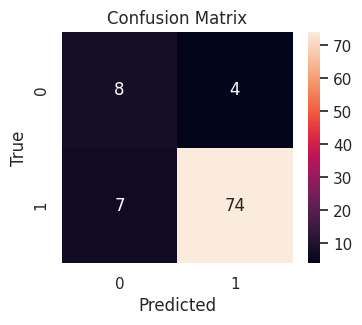

In [ ]:
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)
p5=drugTree.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)
print("DecisionTreeClassifier Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## GBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(x_train,y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.94      0.95      0.94        81

    accuracy                           0.90        93
   macro avg       0.79      0.77      0.78        93
weighted avg       0.90      0.90      0.90        93



Gradient Boosting Classifier Success Rate: 90.32%


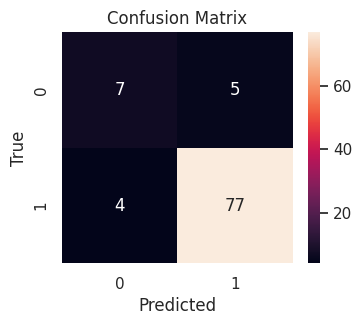

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)
p5=gradient_booster.predict(x_test)
s2=accuracy_score(y_test,p5)
accuracy = accuracy_score(y_test, p5)

print("Gradient Boosting Classifier Success Rate: {:.2f}%".format(100 * s2))

cm = confusion_matrix(y_test, p5)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', square=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()